In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# loading the csv data to a Pandas DataFrame
cv_data = pd.read_csv('/content/drive/MyDrive/Cattle Project (Yohan)/Cow health management/Milk Prediction/milknew.csv')

In [3]:
cv_data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
cv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [6]:
cv_data.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


In [9]:
label_encoder = LabelEncoder()
cv_data['Grade'] = label_encoder.fit_transform(cv_data['Grade'])

In [10]:
cv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 66.3 KB


In [11]:
X = cv_data.drop(columns=['Grade'])
y = cv_data['Grade']

In [21]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of Regression Types
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree Regression": DecisionTreeRegressor()
}

def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_r2_score = r2_score(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    return train_r2_score, test_mse

for model_name, model in models.items():
    train_r2, test_mse = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    print(f"{model_name} - Train R-squared (Accuracy): {train_r2:.4f}, Test MSE: {test_mse:.4f}")

Linear Regression - Train R-squared (Accuracy): 0.4205, Test MSE: 0.3434
Ridge Regression - Train R-squared (Accuracy): 0.4205, Test MSE: 0.3434
Lasso Regression - Train R-squared (Accuracy): 0.0000, Test MSE: 0.6071
ElasticNet Regression - Train R-squared (Accuracy): 0.0227, Test MSE: 0.5908
Decision Tree Regression - Train R-squared (Accuracy): 1.0000, Test MSE: 0.0236


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared for training data
y_train_pred = model.predict(X_train)
train_r2_score = r2_score(y_train, y_train_pred)
print(f'Training R-squared (Accuracy) Score: {train_r2_score}')

# Optional: View model coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 0.34339241582457214
Training R-squared (Accuracy) Score: 0.4204753461041857
Coefficients: [-0.04831414 -0.00727603 -0.21090816 -0.49968902 -0.46263732 -0.17877578
 -0.03353879]
Intercept: 10.920062441214702


In [16]:
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_tree_pred = tree_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
tree_mse = mean_squared_error(y_test, y_tree_pred)
print(f'Mean Squared Error (Decision Tree): {tree_mse}')

# Calculate R-squared for training data
y_train_tree_pred = tree_model.predict(X_train)
train_tree_r2_score = r2_score(y_train, y_train_tree_pred)
print(f'Training R-squared (Decision Tree) Score: {train_tree_r2_score}')

# Optional: View the depth and number of leaves in the decision tree
print('Tree Depth:', tree_model.get_depth())
print('Number of Leaves:', tree_model.get_n_leaves())

Mean Squared Error (Decision Tree): 0.02358490566037736
Training R-squared (Decision Tree) Score: 1.0
Tree Depth: 8
Number of Leaves: 21


In [18]:
import joblib
joblib.dump(tree_model, "milk_model_dt.joblib")

['milk_model_dt.joblib']

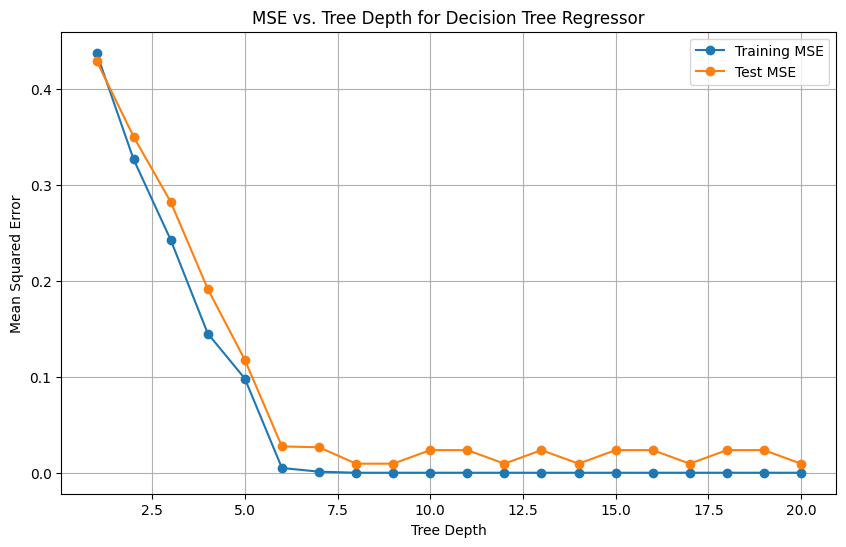

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Initialize lists to store MSE values for training and test sets
train_mse_list = []
test_mse_list = []

# performance
max_depths = range(1, 21)

# Loop over different tree depths
for depth in max_depths:
    # Initialize Decision Tree model with current depth
    tree_model = DecisionTreeRegressor(max_depth=depth)

    # Fit the model
    tree_model.fit(X_train, y_train)

    # Predict on training data and calculate MSE
    y_train_pred = tree_model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mse_list.append(train_mse)

    # Predict on test data and calculate MSE
    y_test_pred = tree_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mse_list.append(test_mse)

# Plot MSE
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_mse_list, label='Training MSE', marker='o')
plt.plot(max_depths, test_mse_list, label='Test MSE', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Tree Depth for Decision Tree Regressor')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
import numpy as np

def predict_milk_grade(model, pH, Temprature, Taste, Odor, Fat, Turbidity, Colour):
    input_data = np.array([[pH, Temprature, Taste, Odor, Fat, Turbidity, Colour]])
    predicted_grade = model.predict(input_data)

    grade_mapping = {0: 'high', 1: 'low', 2: 'medium'}
    predicted_grade_category = grade_mapping[predicted_grade[0]]

    return predicted_grade_category

In [25]:
pH = 6.6
Temprature = 35
Taste = 1
Odor = 0
Fat = 1
Turbidity = 0
Colour = 254

predicted_grade = predict_milk_grade(tree_model, pH, Temprature, Taste, Odor, Fat, Turbidity, Colour)
print(f'Predicted Grade: {predicted_grade}')

Predicted Grade: high


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
